# Step 1: Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
import random
!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 9.0 MB/s eta 0:00:00


In [2]:
# Setting random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Step 2: Load and Explore the Dataset

In [3]:
df=pd.read_csv('IMDB Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


,sentiment,count
0,positive,25000
1,negative,25000


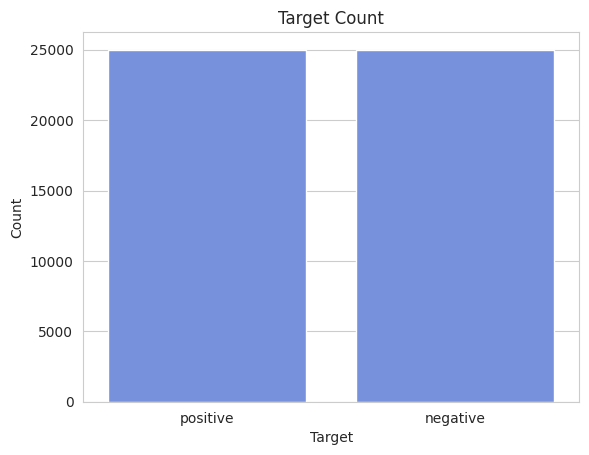

In [4]:
display(df['sentiment'].value_counts().reset_index())

sns.set_style("whitegrid")
sns.set_palette("coolwarm")

sns.countplot(x=df['sentiment'])
plt.title("Target Count")
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Step 3: Text Preprocessing

We will clean and normalize the IMDB reviews using a robust NLP pipeline. Each sub-step will be implemented in a separate cell for clarity and modularity:

* Lowercase conversion
* HTML tag removal
* URL removal
* Emoji conversion
* Punctuation removal
* Stopword removal
* Lemmatization
* Apply the pipeline to all reviews

In [5]:
# Lowercase conversion
example_review = df['review'][0]
print('Original:', example_review)
lowercased = example_review.lower()
print('Lowercased:', lowercased)

Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

In [6]:
# HTML tag removal
import re
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)
html_removed = remove_html(lowercased)
print('HTML removed:', html_removed)

HTML removed: one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where o

In [7]:
# URL removal
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)
url_removed = remove_url(html_removed)
print('URL removed:', url_removed)

URL removed: one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where ot

In [8]:
# Emoji conversion
import emoji
def convert_emoji(text):
    return emoji.demojize(text)
emoji_converted = convert_emoji(url_removed)
print('Emoji converted:', emoji_converted)

Emoji converted: one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes wher

In [9]:
# Punctuation removal
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
punc_removed = remove_punctuation(emoji_converted)
print('Punctuation removed:', punc_removed)

Punctuation removed: one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare 

In [10]:
# Stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword_set = set(stopwords.words('english'))
no_stopwords = [w for w in punc_removed.split() if w not in stopword_set]
print('Stopwords removed:', no_stopwords)

Stopwords removed: ['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in no_stopwords]
print('Lemmatized:', lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Lemmatized: ['one', 'reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audi

In [12]:
# Apply the full pipeline to all reviews
def preprocess_review(text):
    text = text.lower()
    text = remove_html(text)
    text = remove_url(text)
    text = convert_emoji(text)
    text = remove_punctuation(text)
    words = text.split()
    words = [w for w in words if w not in stopword_set]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_review)
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode y...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# Embedding & Create Baseline Models

In [13]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'],
    df['sentiment'],
    test_size=0.2,
    random_state=42)

In [14]:
# TF-DF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2))  # unigrams + bigrams


X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [15]:
print("X Train Shape:", X_train_tfidf.shape)
print("X Test Shape:", X_test_tfidf.shape)
print("Y Train Shape:", y_train.shape)
print("Y Test Shape:", y_test.shape)

X Train Shape: (40000, 5000)
X Test Shape: (10000, 5000)
Y Train Shape: (40000,)
Y Test Shape: (10000,)


## Model 1: Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

y_pred_lr = log_reg.predict(X_test_tfidf)

print("LOGISTIC REGRESSION:")
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [17]:
# Prediction
new_review = ["The pacing of the movie was slow, and it didn't sustain my interest."]

# 1. Clean using your actual cleaning function
cleaned_new = [preprocess_review(r) for r in new_review]

# 2. Transform using your existing TF-IDF vectorizer
X_new = tfidf.transform(cleaned_new)

# 3. Predict label ("positive" or "negative")
pred_label = log_reg.predict(X_new)[0]

# 4. Get prediction probabilities
#    This avoids the IndexError because we use max(), not array indexing
pred_prob = log_reg.predict_proba(X_new)[0].max()

# 5. Convert string label to emoji output
sentiment = "Positive 😀" if pred_label == "positive" else "Negative 😞"

print("Review:", new_review[0])
print(f"Predicted Sentiment: {sentiment} (Confidence: {pred_prob:.2f})")



Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 0.92)


## Model 2: Linear SVC (SVM)

In [18]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

y_pred_svc = svc.predict(X_test_tfidf)

print("LINEAR SVC:")
print(classification_report(y_test, y_pred_svc))

LINEAR SVC:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.89      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [19]:
# Prediction on Linear SVC Model
new_review = ["The pacing of the movie was slow, and it didn't sustain my interest."]

# 1. Clean the new text
cleaned_new = [preprocess_review(r) for r in new_review]

# 2. Transform with TF-IDF vectorizer
X_new = tfidf.transform(cleaned_new)

# 3. Predict (gives "positive" or "negative")
pred_label = svc.predict(X_new)[0]

# 4. Confidence using decision function (scaled to 0–1)
decision_value = svc.decision_function(X_new)[0]
confidence = 1 / (1 + np.exp(-abs(decision_value)))   # sigmoid for scaling

# 5. Convert to emoji sentiment
sentiment = "Positive 😀" if pred_label == "positive" else "Negative 😞"

print("Review:", new_review[0])
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 0.80)


## Confusion Matrix

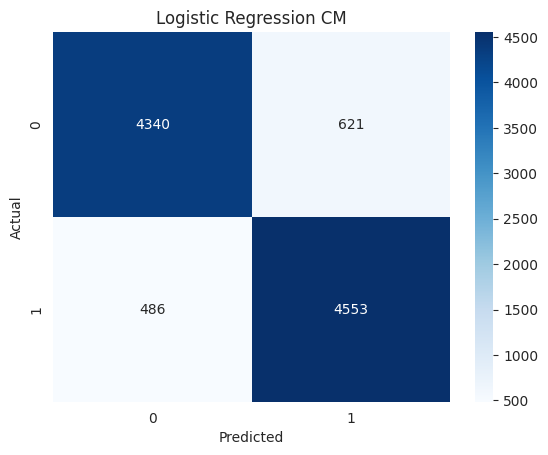

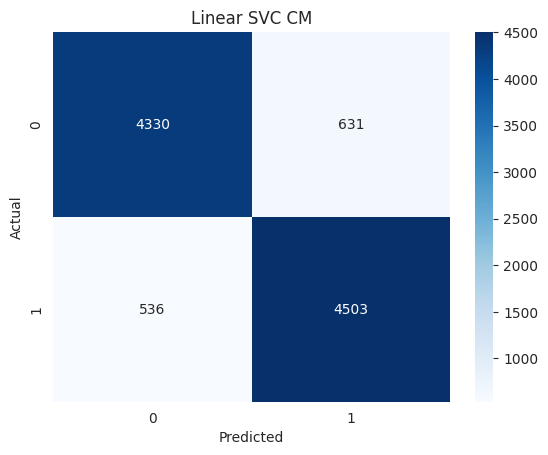

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_cm(y_test, y_pred_lr, "Logistic Regression CM")
plot_cm(y_test, y_pred_svc, "Linear SVC CM")

# Issuing Class Imbalance ( 60/40) with realistic skew

In [21]:
# Split first
from sklearn.model_selection import train_test_split

X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [22]:
# Making the TRAINING set 60% negative / 40% positive

# Extract training rows only
train_df = pd.DataFrame({
    'cleaned_review': X_train.reset_index(drop=True),
    'sentiment': y_train.reset_index(drop=True)})

# Separate classes
neg = train_df[train_df['sentiment'] == 'negative']
pos = train_df[train_df['sentiment'] == 'positive']

# Determine counts for 60/40
desired_pos = int(len(neg) * (0.4 / 0.6))

pos_downsampled = pos.sample(n=desired_pos, random_state=42)

train_60_40 = pd.concat([neg, pos_downsampled]).sample(frac=1, random_state=42)


In [23]:
print(train_df['sentiment'].value_counts())


sentiment
positive    20000
negative    20000
Name: count, dtype: int64


In [24]:
# Final X_train, y_train (60/40)
X_train_60_40 = train_60_40['cleaned_review']
y_train_60_40 = train_60_40['sentiment']

print("Training distribution (60/40 expected):")
print(y_train_60_40.value_counts())

Training distribution (60/40 expected):
sentiment
negative    20000
positive    13333
Name: count, dtype: int64


In [25]:
# Encode Lables + TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Features + target
X_train = train_60_40["cleaned_review"]
y_train = train_60_40["sentiment"]

# Encode positive/negative as 0/1
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)

In [26]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_tfidf, y_train_enc, test_size=0.2, random_state=42, stratify=y_train_enc)

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_tr, y_tr)

log_pred = log_reg.predict(X_val)

Linear SVC

In [28]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_tr, y_tr)

svc_pred = svc.predict(X_val)

Evaluation

In [29]:
from sklearn.metrics import classification_report, accuracy_score

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_val, log_pred))
print(classification_report(y_val, log_pred, target_names=le.classes_))

print("\n=== Linear SVC ===")
print("Accuracy:", accuracy_score(y_val, svc_pred))
print(classification_report(y_val, svc_pred, target_names=le.classes_))

=== Logistic Regression ===
Accuracy: 0.8824058797060147
              precision    recall  f1-score   support

    negative       0.89      0.92      0.90      4000
    positive       0.87      0.83      0.85      2667

    accuracy                           0.88      6667
   macro avg       0.88      0.87      0.88      6667
weighted avg       0.88      0.88      0.88      6667


=== Linear SVC ===
Accuracy: 0.8756562171891406
              precision    recall  f1-score   support

    negative       0.89      0.91      0.90      4000
    positive       0.86      0.83      0.84      2667

    accuracy                           0.88      6667
   macro avg       0.87      0.87      0.87      6667
weighted avg       0.88      0.88      0.88      6667



Prediction

In [30]:
# Logisitc Regression

# --- 1. New review to test ---
new_review = ["The pacing of the movie was slow, and it didn't sustain my interest."]

# --- 2. Clean the new review (use your preprocessing function) ---
cleaned_new = [preprocess_review(r) for r in new_review]

# --- 3. Transform using the TF-IDF vectorizer you fitted earlier ---
X_new = tfidf.transform(cleaned_new)

# --- 4. Predict label (this gives 0/1) ---
pred_encoded = log_reg.predict(X_new)[0]

# --- 5. Convert encoded label back to "positive"/"negative" ---
pred_label = le.inverse_transform([pred_encoded])[0]

# --- 6. Confidence score from decision function ---
decision_value = log_reg.decision_function(X_new)[0]

# Convert to 0–1 confidence (sigmoid on absolute margin)
confidence = 1 / (1 + np.exp(-abs(decision_value)))

# --- 7. Emoji output ---
sentiment = "Positive 😀" if pred_label == "positive" else "Negative 😞"

# --- 8. Print results ---
print("Review:", new_review[0])
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 0.93)


In [31]:
# Linear SVC

# --- 1. New review to test ---
new_review = ["The pacing of the movie was slow, and it didn't sustain my interest."]
# --- 2. Clean the new review (use your preprocessing function) ---
cleaned_new = [preprocess_review(r) for r in new_review]

# --- 3. Transform using the TF-IDF vectorizer you fitted earlier ---
X_new = tfidf.transform(cleaned_new)

# --- 4. Predict label (this gives 0/1) ---
pred_encoded = svc.predict(X_new)[0]

# --- 5. Convert encoded label back to "positive"/"negative" ---
pred_label = le.inverse_transform([pred_encoded])[0]

# --- 6. Confidence score from decision function ---
decision_value = svc.decision_function(X_new)[0]

# Convert to 0–1 confidence (sigmoid on absolute margin)
confidence = 1 / (1 + np.exp(-abs(decision_value)))

# --- 7. Emoji output ---
sentiment = "Positive 😀" if pred_label == "positive" else "Negative 😞"

# --- 8. Print results ---
print("Review:", new_review[0])
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 0.84)


Confusion Matrix

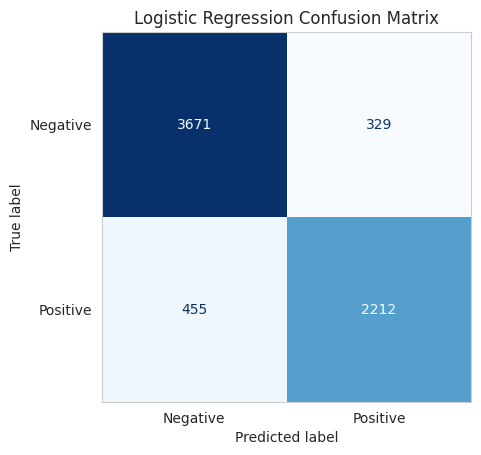

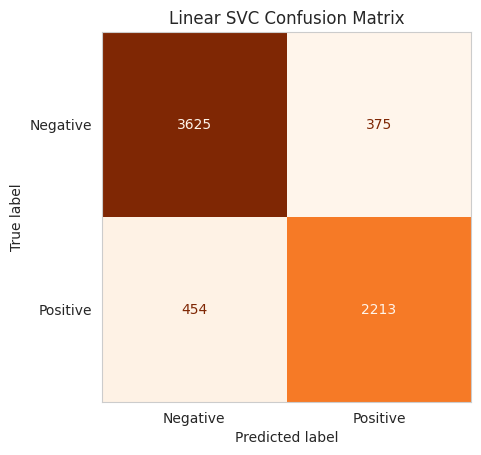

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression (Blue)
cm_log = confusion_matrix(y_val, log_pred)
disp_log = ConfusionMatrixDisplay(cm_log, display_labels=["Negative", "Positive"])
disp_log.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.grid(False)  # remove grid lines
plt.show()

# Linear SVC (Orange)
cm_svc = confusion_matrix(y_val, svc_pred)
disp_svc = ConfusionMatrixDisplay(cm_svc, display_labels=["Negative", "Positive"])
disp_svc.plot(cmap=plt.cm.Oranges, colorbar=False)
plt.title("Linear SVC Confusion Matrix")
plt.grid(False)  # remove grid lines
plt.show()


# Word2Vec Features

In [33]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 60.0 MB/s eta 0:00:00


In [34]:
# Tokenize each review
# Convert each review to a list of words
tokenized_reviews = [review.split() for review in df['cleaned_review']]

from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4)

In [35]:
def sentence_w2v_embedding(sentence,vector_size=100):
    vecs = []
    tokens=sentence.split()
    model=w2v_model

    for t in tokens:
        if t in model.wv:
            vecs.append(model.wv[t])
    if len(vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(vecs, axis=0)

In [36]:
# 1. Target variable
y = df['sentiment']

# 2. Generate Word2Vec embeddings for each review
X_w2v = df['cleaned_review'].apply(sentence_w2v_embedding)

# 3. Train-test split
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(
    X_w2v, y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
    stratify=y)

# 4. Convert Series of arrays into 2D arrays
X_w2v_train = np.vstack(X_w2v_train)
X_w2v_test  = np.vstack(X_w2v_test)

# 5. Check shapes
print('X Train:', X_w2v_train.shape)
print('X Test:', X_w2v_test.shape)
print('Y Train:', y_w2v_train.shape)
print('Y Test:', y_w2v_test.shape)

X Train: (40000, 100)
X Test: (10000, 100)
Y Train: (40000,)
Y Test: (10000,)


Logistic Regresssion

In [37]:
LR=LogisticRegression(max_iter=1000)
LR.fit(X_w2v_train,y_w2v_train)
y_w2v_pred=LR.predict(X_w2v_test)

print('\nClassification Report:\n', classification_report(y_w2v_test,y_w2v_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.86      0.86      5000
    positive       0.86      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [38]:
def review_to_w2v_vector(review, w2v_model, embedding_size=100):
    """
    Converts a single review (string) into an averaged Word2Vec vector.
    """
    # 1. Clean the review using your cleaning function
    cleaned = preprocess_review(review)   # <--- replace with your actual cleaning function
    tokens = cleaned.split()

    # 2. Average word vectors
    vec = np.zeros(embedding_size)
    count = 0
    for word in tokens:
        if word in w2v_model.wv:
            vec += w2v_model.wv[word]
            count += 1
    if count > 0:
        vec /= count
    return vec

In [39]:
def predict_review_w2v(review, model, w2v_model, embedding_size=100):
    """
    Predict sentiment of a single review using Word2Vec features.
    """
    # Convert to Word2Vec vector
    X_new = review_to_w2v_vector(review, w2v_model, embedding_size).reshape(1, -1)

    # Predict label
    pred_label = model.predict(X_new)[0]

    # Get confidence
    if hasattr(model, "predict_proba"):   # Logistic Regression, Random Forest
        pred_prob = model.predict_proba(X_new)[0].max()
    else:  # LinearSVC: use decision_function
        decision_value = model.decision_function(X_new)[0]
        pred_prob = 1 / (1 + np.exp(-abs(decision_value)))  # sigmoid

    # Convert to emoji sentiment
    sentiment = "Positive 😀" if pred_label == "positive" else "Negative 😞"

    return sentiment, pred_prob

In [40]:
review_neg = "The pacing of the movie was slow, and it didn't sustain my interest."
sentiment, confidence = predict_review_w2v(review_neg, LR, w2v_model)
print(f"Review: {review_neg}")
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 1.00)


Linear SVC

In [41]:
from sklearn.svm import LinearSVC

# Initialize Linear SVC
SVC_w2v = LinearSVC(max_iter=5000, random_state=42)

# Fit on Word2Vec features
SVC_w2v.fit(X_w2v_train, y_w2v_train)

# Optional: evaluate on test set
y_pred = SVC_w2v.predict(X_w2v_test)

from sklearn.metrics import classification_report
print(classification_report(y_w2v_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      5000
    positive       0.86      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [42]:
# Prediction Function for New Reviews
import numpy as np

def predict_review_svc_w2v(review, model, w2v_model, embedding_size=100):
    """
    Predict sentiment for a single review using Linear SVC with Word2Vec embeddings.
    """
    # Convert review to Word2Vec vector
    X_new = review_to_w2v_vector(review, w2v_model, embedding_size).reshape(1, -1)

    # Predict label
    pred_label = model.predict(X_new)[0]

    # Compute confidence using decision_function
    decision_value = model.decision_function(X_new)[0]
    confidence = 1 / (1 + np.exp(-abs(decision_value)))  # scaled 0-1

    # Convert label to emoji
    sentiment = "Positive 😀" if pred_label == "positive" else "Negative 😞"

    return sentiment, confidence

In [43]:
# Test New Reviews

# Positive review
review_pos = "The movie was absolutely wonderful, with great acting and a beautiful story"
sentiment, confidence = predict_review_svc_w2v(review_pos, SVC_w2v, w2v_model)
print(f"Review: {review_pos}")
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

# Negative review
review_neg = "The pacing of the movie was slow, and it didn't sustain my interest."
sentiment, confidence = predict_review_svc_w2v(review_neg, SVC_w2v, w2v_model)
print(f"Review: {review_neg}")
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

Review: The movie was absolutely wonderful, with great acting and a beautiful story
Predicted Sentiment: Positive 😀 (Confidence: 1.00)
Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 0.95)


Confusion Matrix

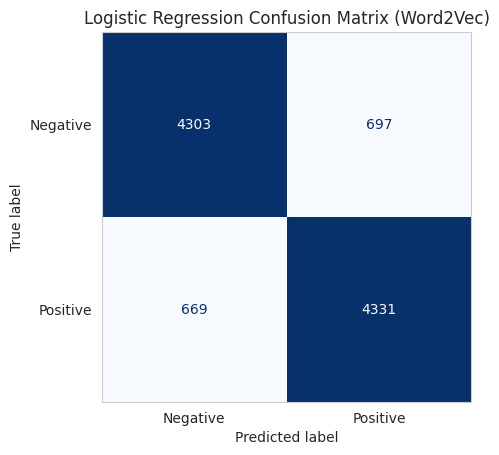

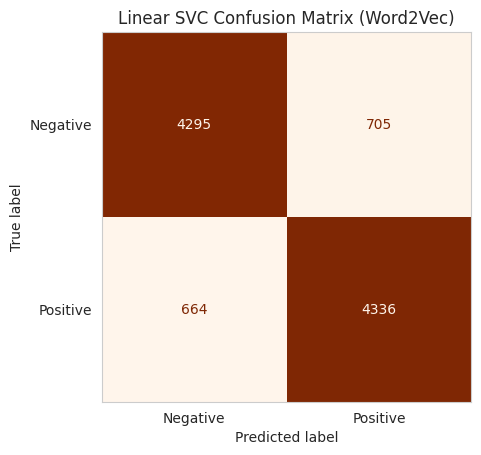

In [44]:
# Logistic Regression Confusion Matrix (Blue)
cm_lr = confusion_matrix(y_w2v_test, y_w2v_pred)
disp_lr = ConfusionMatrixDisplay(cm_lr, display_labels=["Negative", "Positive"])
disp_lr.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title("Logistic Regression Confusion Matrix (Word2Vec)")
plt.grid(False)
plt.show()

# Linear SVC Confusion Matrix (Orange)
cm_svc = confusion_matrix(y_w2v_test, y_pred)
disp_svc = ConfusionMatrixDisplay(cm_svc, display_labels=["Negative", "Positive"])
disp_svc.plot(cmap=plt.cm.Oranges, colorbar=False)
plt.title("Linear SVC Confusion Matrix (Word2Vec)")
plt.grid(False)
plt.show()

## Imbalance

In [45]:
# 1.  Train Word2Vec on tokenized reviews
from gensim.models import Word2Vec

# Convert each review to a list of words
tokenized_reviews = [review.split() for review in df['cleaned_review']]

w2v_model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4)

def sentence_w2v_embedding(sentence, vector_size=100):
    vecs = []
    tokens = sentence.split()
    for t in tokens:
        if t in w2v_model.wv:
            vecs.append(w2v_model.wv[t])
    if len(vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(vecs, axis=0)

In [46]:
# 2. 60/40 training split

pos_df = df[df['sentiment'] == 'positive']
neg_df = df[df['sentiment'] == 'negative']

pos_train = pos_df.sample(n=int(0.6*len(pos_df)), random_state=42)  # 15k
neg_train = neg_df.sample(n=int(0.4*len(neg_df)), random_state=42)  # 10k

train_60_40 = pd.concat([pos_train, neg_train])
test_60_40 = df.drop(train_60_40.index)

X_train_text = train_60_40['cleaned_review']
y_train = train_60_40['sentiment']
X_test_text = test_60_40['cleaned_review']
y_test = test_60_40['sentiment']

print("Training distribution (60/40 expected):")
print(y_train.value_counts())

Training distribution (60/40 expected):
sentiment
positive    15000
negative    10000
Name: count, dtype: int64


In [47]:
# 3. Generate Word2Vec embeddings

X_w2v_train = np.array([sentence_w2v_embedding(r) for r in X_train_text])
X_w2v_test  = np.array([sentence_w2v_embedding(r) for r in X_test_text])

print('X Train:', X_w2v_train.shape)
print('X Test:', X_w2v_test.shape)
print('Y Train:', y_train.shape)
print('Y Test:', y_test.shape)

X Train: (25000, 100)
X Test: (25000, 100)
Y Train: (25000,)
Y Test: (25000,)


Logistic Regression Model

In [48]:
# 4. Train Logistic Regression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_w2v_train, y_train)
y_pred = LR.predict(X_w2v_test)

print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.81      0.86     15000
    positive       0.76      0.91      0.83     10000

    accuracy                           0.85     25000
   macro avg       0.84      0.86      0.85     25000
weighted avg       0.86      0.85      0.85     25000



In [49]:
# 5. Predict a new review

def review_to_w2v_vector(review, w2v_model, embedding_size=100):
    tokens = review.split()
    vec = np.zeros(embedding_size)
    count = 0
    for word in tokens:
        if word in w2v_model.wv:
            vec += w2v_model.wv[word]
            count += 1
    if count > 0:
        vec /= count
    return vec

def predict_review_w2v(review, model, w2v_model, embedding_size=100):
    X_new = review_to_w2v_vector(review, w2v_model, embedding_size).reshape(1, -1)
    pred_label = model.predict(X_new)[0]

    # Confidence
    if hasattr(model, "predict_proba"):
        pred_prob = model.predict_proba(X_new)[0].max()
    else:
        decision_value = model.decision_function(X_new)[0]
        pred_prob = 1 / (1 + np.exp(-abs(decision_value)))

    sentiment = "Positive 😀" if pred_label == 1 else "Negative 😞"
    return sentiment, pred_prob

# Example negative review
review_neg = "The pacing of the movie was slow, and it didn't sustain my interest."
sentiment, confidence = predict_review_w2v(review_neg, LR, w2v_model)
print(f"Review: {review_neg}")
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 0.99)


Linear SVC

In [50]:
# Train Linear SVC
SVC_model = LinearSVC(max_iter=5000)
SVC_model.fit(X_w2v_train, y_train)
y_pred_svc = SVC_model.predict(X_w2v_test)

print("\nLinear SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nLinear SVC Classification Report:\n", classification_report(y_test, y_pred_svc))


Linear SVC Accuracy: 0.84572

Linear SVC Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.80      0.86     15000
    positive       0.76      0.91      0.82     10000

    accuracy                           0.85     25000
   macro avg       0.84      0.86      0.84     25000
weighted avg       0.86      0.85      0.85     25000



In [51]:
#Predict a single review with Linear SVC

def predict_review_w2v_svc(review, model, w2v_model, embedding_size=100):
    X_new = review_to_w2v_vector(review, w2v_model, embedding_size).reshape(1, -1)
    pred_label = model.predict(X_new)[0]

    # Use decision_function for confidence
    decision_value = model.decision_function(X_new)[0]
    pred_prob = 1 / (1 + np.exp(-abs(decision_value)))  # sigmoid to scale 0-1

    sentiment = "Positive 😀" if pred_label == 'positive' else "Negative 😞"
    return sentiment, pred_prob

review_neg = "The pacing of the movie was slow, and it didn't sustain my interest."
sentiment_svc, confidence_svc = predict_review_w2v_svc(review_neg, SVC_model, w2v_model)
print(f"\nLinear SVC Prediction:\nReview: {review_neg}")
print(f"Predicted Sentiment: {sentiment_svc} (Confidence: {confidence_svc:.2f})")


Linear SVC Prediction:
Review: The pacing of the movie was slow, and it didn't sustain my interest.
Predicted Sentiment: Negative 😞 (Confidence: 0.82)


Confusion Matrix

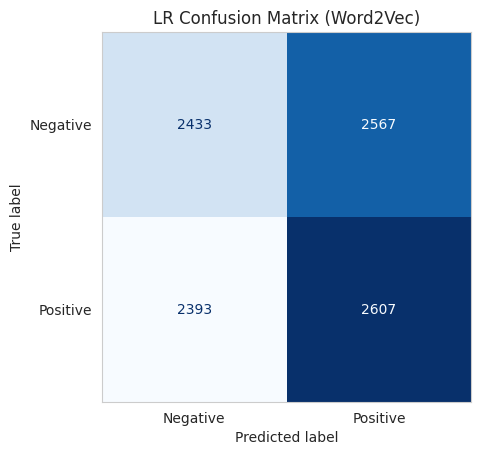

ValueError: Found input variables with inconsistent numbers of samples: [10000, 25000]

In [52]:
# LR CM
cm_lr = confusion_matrix(y_w2v_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr, display_labels=["Negative","Positive"]).plot(cmap=plt.cm.Blues, colorbar=False)
plt.title("LR Confusion Matrix (Word2Vec)")
plt.grid(False)
plt.show()

# Linear SVC CM

cm_svc = confusion_matrix(y_w2v_test, y_pred_svc)
ConfusionMatrixDisplay(cm_svc, display_labels=["Negative","Positive"]).plot(cmap=plt.cm.Oranges, colorbar=False)
plt.title("Linear SVC Confusion Matrix (Word2Vec)")
plt.grid(False)
plt.show()

# Glove Features

In [53]:
import numpy as np

glove_file_path = "glove.6B.100d.txt"

embeddings_index = {}
with open(glove_file_path, "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print("Loaded vectors:", len(embeddings_index))

Loaded vectors: 400000


In [54]:
# Function to convert a sentence to GloVe vector
def sentence_glove_embedding(text):
    words = text.split()
    vectors = [embeddings_index[w] for w in words if w in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

In [55]:
# Apply to dataset
X_glove = df['cleaned_review'].apply(sentence_glove_embedding)
X_glove = np.vstack(X_glove)

# Ensure y is numeric 0/1
y_numeric = df['sentiment'].map({"negative": 0, "positive": 1}).values

In [56]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_glove, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric)


In [57]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7933
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      5000
           1       0.79      0.79      0.79      5000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [58]:
# Train Linear SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

SVC_model = LinearSVC(max_iter=5000)  # increase max_iter if needed
SVC_model.fit(X_train, y_train)
y_pred_svc = SVC_model.predict(X_test)

print("Linear SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Linear SVC Accuracy: 0.795
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5000
           1       0.79      0.80      0.80      5000

    accuracy                           0.80     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.80      0.79     10000



Prediction

In [61]:
# Predict a new review using GloVe embeddings
new_review = ["The pacing of the movie was slow, and it didn't sustain my interest"]

# Clean the review exactly like during training
cleaned_review = [preprocess_review(r) for r in new_review]   # <-- FIXED

# Convert to GloVe embedding
def sentence_glove_embedding(text):
    words = text.split()
    vectors = [embeddings_index[w] for w in words if w in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(100)  # embedding size
    return np.mean(vectors, axis=0)

X_new = np.array([sentence_glove_embedding(cleaned_review[0])]).reshape(1, -1)

# ------------------------------
# Logistic Regression prediction
# ------------------------------
pred_label_lr = LR.predict(X_new)[0]

if hasattr(LR, "predict_proba"):
    probabilities = LR.predict_proba(X_new)[0]
    confidence_lr = probabilities[pred_label_lr]
else:
    confidence_lr = 1.0

sentiment_lr = "Positive 😀" if pred_label_lr == 1 else "Negative 😞"
print(f"LR Prediction: {sentiment_lr} (Confidence: {confidence_lr:.2f})")

# ------------------------------
# Linear SVC prediction
# ------------------------------
pred_label_svc = SVC_model.predict(X_new)[0]

decision_value = SVC_model.decision_function(X_new)[0]
confidence_svc = 1 / (1 + np.exp(-abs(decision_value)))  # sigmoid scaling

sentiment_svc = "Positive 😀" if pred_label_svc == 1 else "Negative 😞"
print(f"SVC Prediction: {sentiment_svc} (Confidence: {confidence_svc:.2f})")



LR Prediction: Negative 😞 (Confidence: 0.88)
SVC Prediction: Negative 😞 (Confidence: 0.66)


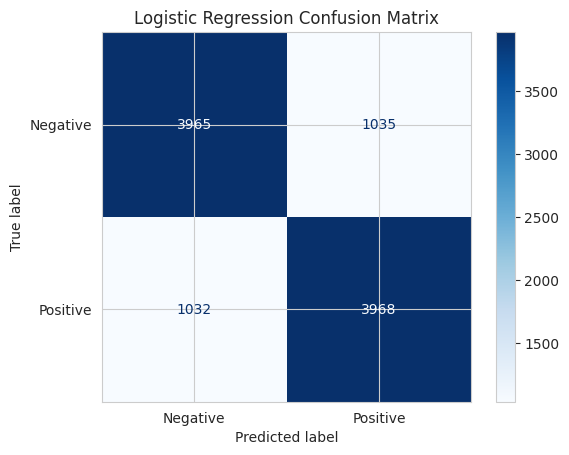

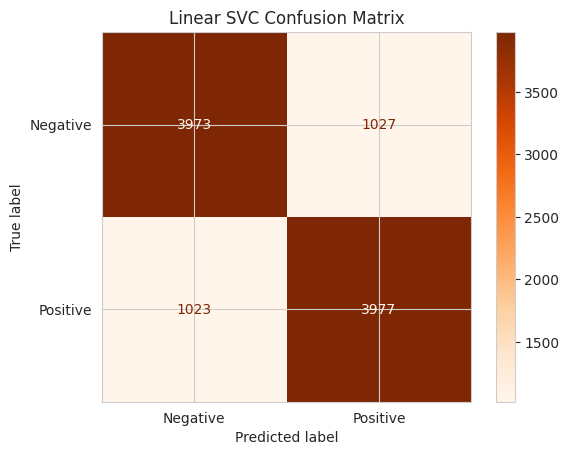

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
cm_lr = confusion_matrix(y_test, LR.predict(X_test))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negative','Positive'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Linear SVC
cm_svc = confusion_matrix(y_test, SVC_model.predict(X_test))
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Negative','Positive'])
disp_svc.plot(cmap=plt.cm.Oranges)
plt.title("Linear SVC Confusion Matrix")
plt.show()

## Imbalance

In [63]:
# 1. Separate by class
pos_indices = np.where(y_numeric == 1)[0]
neg_indices = np.where(y_numeric == 0)[0]

# 60% of positives, 40% of negatives for training
n_pos_train = int(0.6 * len(pos_indices))
n_neg_train = int(0.4 * len(neg_indices))

# Randomly sample indices
np.random.seed(42)
pos_train_idx = np.random.choice(pos_indices, n_pos_train, replace=False)
neg_train_idx = np.random.choice(neg_indices, n_neg_train, replace=False)

train_idx = np.concatenate([pos_train_idx, neg_train_idx])
test_idx = np.array([i for i in range(len(y_numeric)) if i not in train_idx])

In [64]:
# 2. Create train/test sets
X_train = X_glove[train_idx]
y_train = y_numeric[train_idx]

X_test = X_glove[test_idx]
y_test = y_numeric[test_idx]

print("Training distribution (60/40 expected):")
print("Positive:", sum(y_train==1), "Negative:", sum(y_train==0))
print("Test distribution:")
print("Positive:", sum(y_test==1), "Negative:", sum(y_test==0))

Training distribution (60/40 expected):
Positive: 15000 Negative: 10000
Test distribution:
Positive: 10000 Negative: 15000


Logistic Regression Model

In [65]:
# 3. Logistic Regression
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.77108
              precision    recall  f1-score   support

           0       0.89      0.71      0.79     15000
           1       0.66      0.86      0.75     10000

    accuracy                           0.77     25000
   macro avg       0.78      0.79      0.77     25000
weighted avg       0.80      0.77      0.77     25000



Linear SVC Model

In [66]:
# 4. Linear SVC
SVC_model = LinearSVC(max_iter=5000)
SVC_model.fit(X_train, y_train)
y_pred_svc = SVC_model.predict(X_test)

print("\nLinear SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


Linear SVC Accuracy: 0.77112
              precision    recall  f1-score   support

           0       0.88      0.71      0.79     15000
           1       0.67      0.86      0.75     10000

    accuracy                           0.77     25000
   macro avg       0.78      0.79      0.77     25000
weighted avg       0.80      0.77      0.77     25000



Prediction

In [69]:
# Predict a new review using GloVe embeddings
new_review = ["The pacing of the movie was slow, and it didn't sustain my interest"]

# Clean the review exactly like during training
cleaned_review = [preprocess_review(r) for r in new_review]   # <-- FIXED

# Convert to GloVe embedding
def sentence_glove_embedding(text):
    words = text.split()
    vectors = [embeddings_index[w] for w in words if w in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(100)  # embedding size
    return np.mean(vectors, axis=0)

X_new = np.array([sentence_glove_embedding(cleaned_review[0])]).reshape(1, -1)

# ------------------------------
# Logistic Regression prediction
# ------------------------------
pred_label_lr = LR.predict(X_new)[0]

if hasattr(LR, "predict_proba"):
    probabilities = LR.predict_proba(X_new)[0]
    confidence_lr = probabilities[pred_label_lr]
else:
    confidence_lr = 1.0

sentiment_lr = "Positive 😀" if pred_label_lr == 1 else "Negative 😞"
print(f"LR Prediction: {sentiment_lr} (Confidence: {confidence_lr:.2f})")

# ------------------------------
# Linear SVC prediction
# ------------------------------
pred_label_svc = SVC_model.predict(X_new)[0]

decision_value = SVC_model.decision_function(X_new)[0]
confidence_svc = 1 / (1 + np.exp(-abs(decision_value)))  # sigmoid scaling

sentiment_svc = "Positive 😀" if pred_label_svc == 1 else "Negative 😞"
print(f"SVC Prediction: {sentiment_svc} (Confidence: {confidence_svc:.2f})")




LR Prediction: Negative 😞 (Confidence: 0.81)
SVC Prediction: Negative 😞 (Confidence: 0.60)


Confusion Matrice

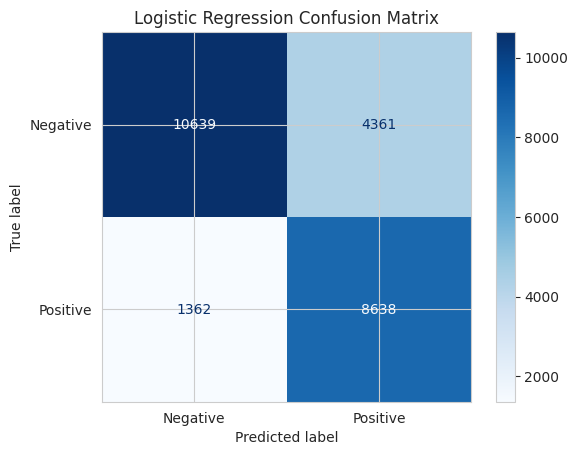

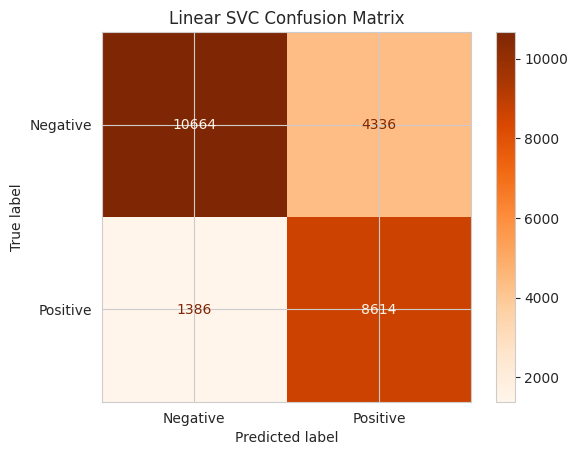

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
cm_lr = confusion_matrix(y_test, LR.predict(X_test))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negative','Positive'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Linear SVC
cm_svc = confusion_matrix(y_test, SVC_model.predict(X_test))
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Negative','Positive'])
disp_svc.plot(cmap=plt.cm.Oranges)
plt.title("Linear SVC Confusion Matrix")
plt.show()

# WordCloud

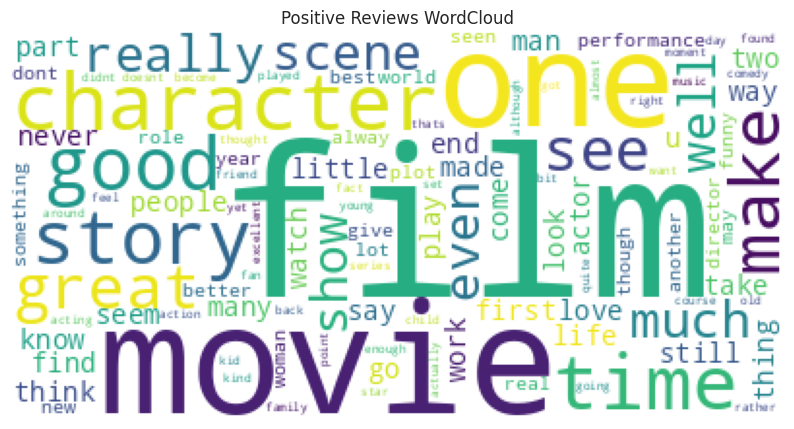

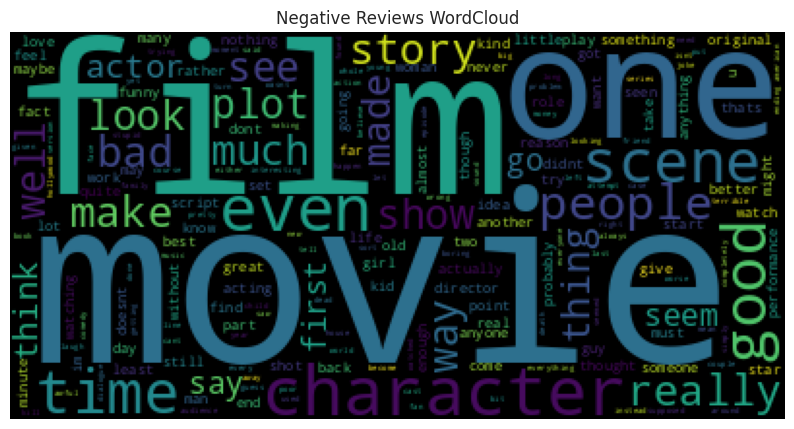

In [71]:
import matplotlib.pyplot as plt

try:
    from wordcloud import WordCloud
except Exception as e:
    print('WordCloud not installed. You can pip install wordcloud to enable word clouds.')
    WordCloud = None

# Sample 2000 reviews each for faster plotting
positive_text = ' '.join(df[df['sentiment']=='positive']['cleaned_review'].sample(n=2000, random_state=42))
negative_text = ' '.join(df[df['sentiment']=='negative']['cleaned_review'].sample(n=2000, random_state=42))

if WordCloud is not None:
    # Positive reviews word cloud
    plt.figure(figsize=(10,6))
    plt.imshow(WordCloud(max_words=200, background_color='white').generate(positive_text))
    plt.axis('off')
    plt.title('Positive Reviews WordCloud')
    plt.show()

    # Negative reviews word cloud
    plt.figure(figsize=(10,6))
    plt.imshow(WordCloud(max_words=200, background_color='black').generate(negative_text))
    plt.axis('off')
    plt.title('Negative Reviews WordCloud')
    plt.show()
else:
    print('Skipping WordCloud display.')